<a href="https://colab.research.google.com/github/lietteff/homework/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задача с файлами

In [ ]:
import random
import datetime

class Question:
    def __init__(self, text, options, correct_answer):
        self.text = text #вопрос
        self.options = options #варианты ответов
        self.correct_answer = correct_answer #правильный ответ

    def shuffle_options(self):
        random.shuffle(self.options)

    def check_answer(self, user_answer):
        return self.options[user_answer - 1] == self.correct_answer


def load_questions(filename):
    questions = []
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('|')
                if len(parts) == 7:
                    text = parts[0]
                    options = parts[1:6]
                    correct_answer_text = parts[6]

                    try:
                        correct_answer_index = options.index(correct_answer_text) + 1
                    except ValueError:
                        print(f"Ошибка: Правильный ответ '{correct_answer_text}' не найден в вариантах для вопроса: {text}")
                        continue

                    questions.append(Question(text, options, correct_answer_text))

                else:
                    print(f"Предупреждение: Неверный формат строки в файле: {line.strip()}")
    except FileNotFoundError:
        print(f"Ошибка: Файл '{filename}' не найден.")
        return None
    except Exception as e:
        print(f"Ошибка при чтении файла: {e}")
        return None

    return questions

def conduct_test(questions):
    start_time = datetime.datetime.now()
    correct_answers = 0
    total_questions = len(questions)

    random.shuffle(questions)  # Перемешиваем вопросы

    for i, question in enumerate(questions):
        question.shuffle_options()  # Перемешиваем варианты ответов
        print(f"Вопрос {i + 1}/{total_questions}: {question.text}")
        for j, option in enumerate(question.options):
            print(f"{j + 1}. {option}")

        while True:
            try:
                user_answer = int(input("Ваш ответ (1-5): "))
                if 1 <= user_answer <= 5:
                    break
                else:
                    print("Пожалуйста, введите число от 1 до 5.")
            except ValueError:
                print("Пожалуйста, введите число.")

        if question.check_answer(user_answer):
            print("Правильно!")
            correct_answers += 1
        else:
            print("Неправильно.")

        print()

    end_time = datetime.datetime.now()
    return start_time, end_time, correct_answers, total_questions


def save_results(filename, start_time, end_time, correct_answers, total_questions):
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(f"Время начала теста: {start_time}\n")
            f.write(f"Время окончания теста: {end_time}\n")
            f.write(f"Общее количество вопросов: {total_questions}\n")
            f.write(f"Количество правильных ответов: {correct_answers}\n")
            percentage = (correct_answers / total_questions) * 100 if total_questions > 0 else 0
            f.write(f"Процент правильных ответов: {percentage:.2f}%\n")
        print(f"Результаты сохранены в файл: {filename}")
    except Exception as e:
        print(f"Ошибка при сохранении результатов в файл: {e}")


def main():
    questions = load_questions("questions.txt")
    if questions is None:
        return

    if not questions:
        print("В файле нет вопросов или они имеют неверный формат.  Проверьте файл questions.txt")
        return

    print("Добро пожаловать в программу тестирования!")

    start_time, end_time, correct_answers, total_questions = conduct_test(questions)

    print("Тестирование завершено!")
    print(f"Общее количество вопросов: {total_questions}")
    print(f"Количество правильных ответов: {correct_answers}")
    percentage = (correct_answers / total_questions) * 100 if total_questions > 0 else 0
    print(f"Процент правильных ответов: {percentage:.2f}%")

    save_results("resultt.txt", start_time, end_time, correct_answers, total_questions)


if __name__ == "__main__":
    main()


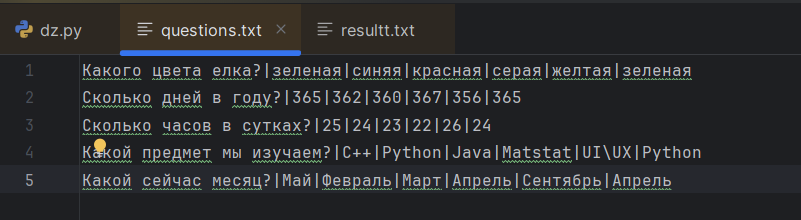

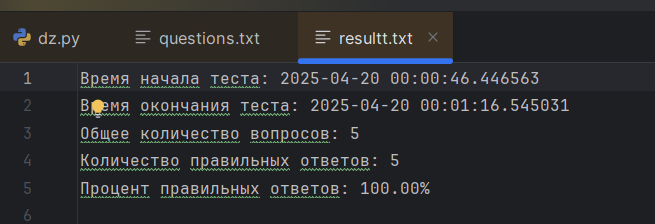